## Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

### Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Описание данных
Данные для первой части

Файл /datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net//datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Пропусков в данных нет, у полей правильные типы данных

In [5]:
hypothesis.duplicated().sum() # явных дубликатов нет

0

In [6]:
hypothesis.columns = hypothesis.columns.str.lower() # столбцы в нижний регистр
hypothesis.sample()

,hypothesis,reach,impact,confidence,efforts
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3


In [7]:
# Устанавливаем опцию pandas для вывода значений столбцов без обрезания
pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [8]:
hypothesis['ice_score'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ice_score'] = hypothesis['ice_score'].round(1) # округлю для удобного восприятия
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)


,hypothesis,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


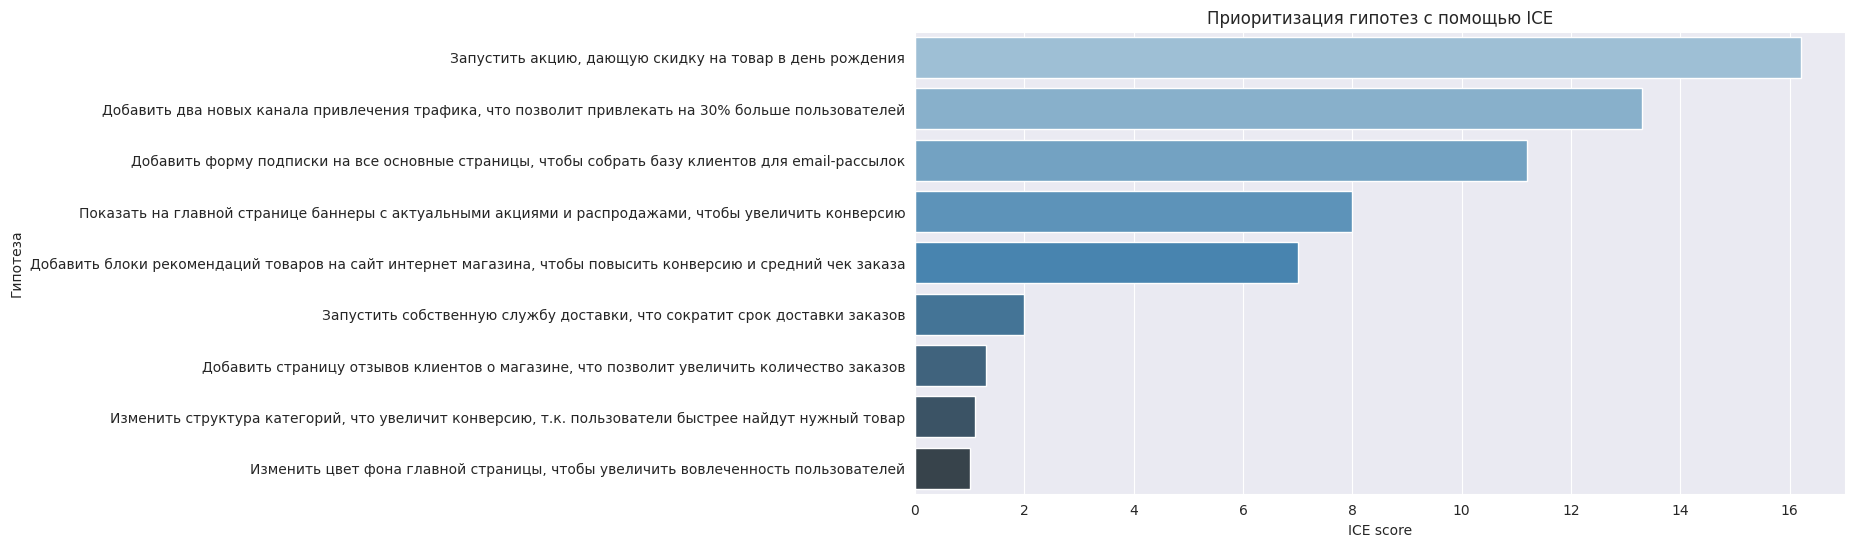

In [9]:
sns.set_style("darkgrid")

hypothesis_plot = hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Приоритизация гипотез с помощью ICE')
sns.barplot(x='ice_score', y='hypothesis', data=hypothesis_plot, palette='Blues_d')
plt.xlabel('ICE score')
plt.ylabel('Гипотеза')
plt.show()

Проверили приоритизацию гипотез по фреймворку ICE. Первые три места:

1. Запустить акцию, дающую скидку на товар в день рождения	
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

 Дальше добавим Reach (скольких пользователей затронет изменение, которое мы хотим внести) и посмотрим на изменения если они будут.

In [10]:
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)

,hypothesis,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


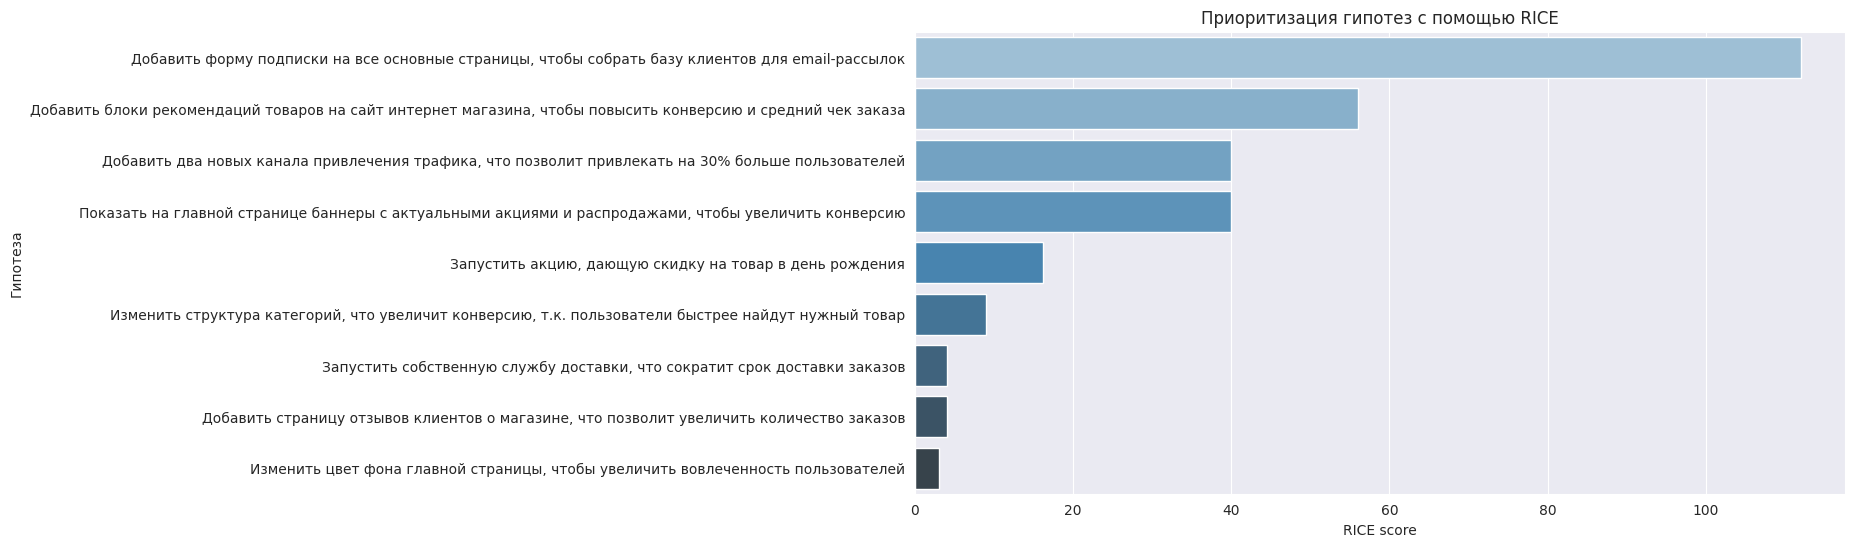

In [11]:
sns.set_style("darkgrid")

hypothesis_plot = hypothesis[['hypothesis', 'rice_score']].sort_values(by='rice_score', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Приоритизация гипотез с помощью RICE')
sns.barplot(x='rice_score', y='hypothesis', data=hypothesis_plot, palette='Blues_d')
plt.xlabel('RICE score')
plt.ylabel('Гипотеза')
plt.show()

Анализ по фреймворку RICE дал другие результаты в сравнении с анализом по фреймворку ICE. В RICE первые три места заняли гипотезы: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Интересно, что гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" оказались в топ-3 и по RICE, и по ICE. Однако, в фреймворке RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" была приоритетнее гипотез "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

Это произошло потому, что фреймворк RICE, в отличие от ICE, учитывает не только важность гипотезы и уверенность в ее успешности, но и охват пользователей, которых затронет изменение. Таким образом, гипотеза с индексом 2, которая предлагает Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, имеет больший охват, чем гипотезы с индексами 7 и 0. Поэтому, гипотеза с индексом 7 стала более приоритетной в фреймворке RICE.

### Часть 2. Анализ A/B-теста
Задача

Проанализируйте A/B-тест:

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
  * Остановить тест, зафиксировать победу одной из групп.
  * Остановить тест, зафиксировать отсутствие различий между группами.
  * Продолжить тест.


#### Описание данных

Данные для второй части

Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [12]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv')

In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Пользователи поделены на две неравные группы А-557 человек, В - 640 человек это почти на 15% больше.

Пропусков в данных нет, у поля date тип object и названия столбцов из строчных и прописных букв. Это нужно изменить.

In [16]:
orders.columns = (orders.columns.str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True).str.lower()) # столбцы в snake_case
orders['date'] = orders['date'].apply(pd.to_datetime)# тип столбца к datetime
orders.sample()

,transaction_id,visitor_id,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A


In [17]:
orders.duplicated().sum() # явных дубликатов нет

0

In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visitors['date'] = visitors['date'].apply(pd.to_datetime) # тип столбца к datetime 

In [21]:
visitors.duplicated().sum() # явных дубликатов нет

0

Столбцы к snake_case и столбцы с датами к datetime. Проверили на явные дубликаты

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


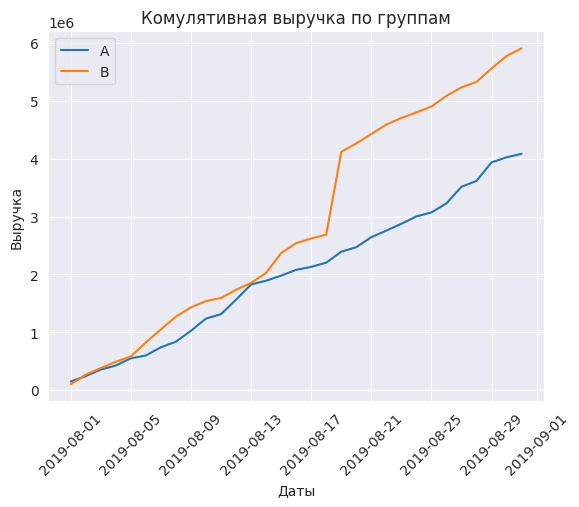

In [22]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

# Разделение таблицы на две по группе теста
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('Комулятивная выручка по группам')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.xticks(rotation=45) # поворот подписей на 45 градусов
plt.legend()
plt.show()

Из графика видно, что группа А демонстрирует линейный прогрессивный рост от начала до конца наблюдений. Группа В также начинает свой путь с аналогичного роста в первые пять дней августа, затем наблюдается некоторое замедление темпов роста, но уже 18 августа происходит резкий скачок.

Однако, при анализе графика необходимо учитывать, что на нем отображается рост выручки, который может быть обусловлен изменением среднего чека или конверсии. Поэтому, возможно, такое поведение графика может быть вызвано несколькими факторами, и необходимо проанализировать каждый из них.

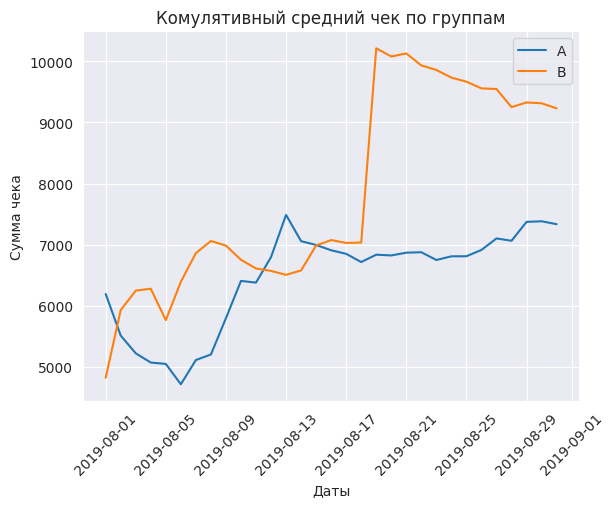

In [23]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Комулятивный средний чек по группам')
plt.xlabel('Даты')
plt.ylabel('Сумма чека')
plt.xticks(rotation= 45) # поворот подписей на 45 градусов
plt.legend()
plt.show()

Группа А средний чек падает в течении 5 дней, потом начинает рост к 13 августа выходит на пик, корректируется и стабилизируется до конца наблюдений.
Группа В чек растет с регулярными корректировками, резкий подъем 18 августа и потом происходит медленое уменьшение среднего чека и на конец наблюдений он все равно существенно выше чем у группы А.

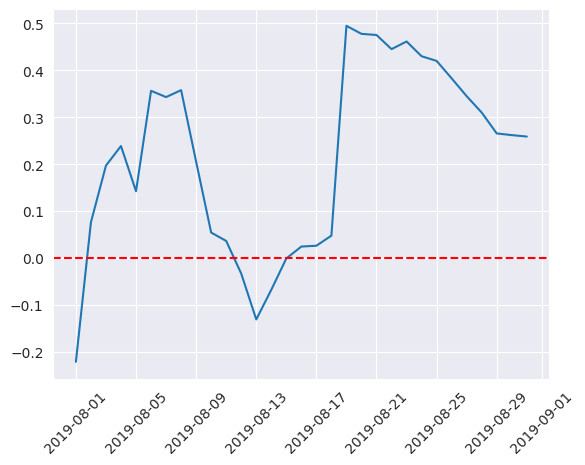

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB']) / 
        (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.xticks(rotation=45) # поворот подписей на 45 градусов


# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


Тоже самое мы видим по соотношению средних чеков, за все наблюдение средний чек группы В был ниже чем группы А 4 дня. В остальное время он выше.

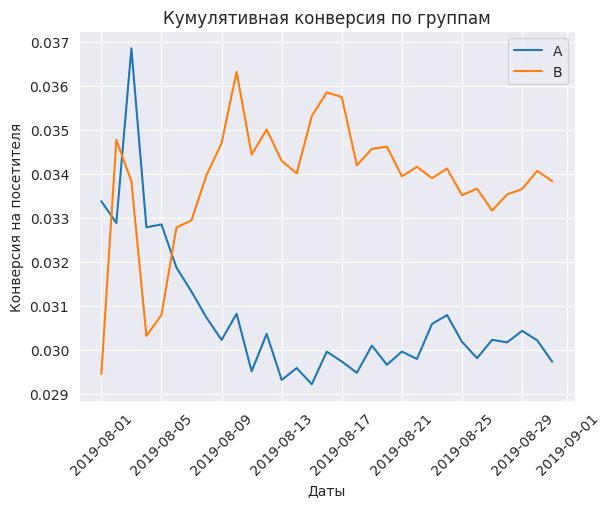

In [25]:
# Получаем кумулятивное количество заказов на посетителя по дням и группам
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Даты')
plt.ylabel('Конверсия на посетителя')
plt.xticks(rotation=45)
plt.legend()
plt.show()


В начале теста комулятивная конверсия по группам имела высокие колебания как у группы А так и группы В и была выше у группы А, потом был спад у обоих групп, группа В начала расти стабилизировалась и была стабильно выше группы А. Группа А после падения стабилизировалась но ее результаты ниже группы В.
Конверсия также выше у группы В.(но и пользователей больше на 15%)

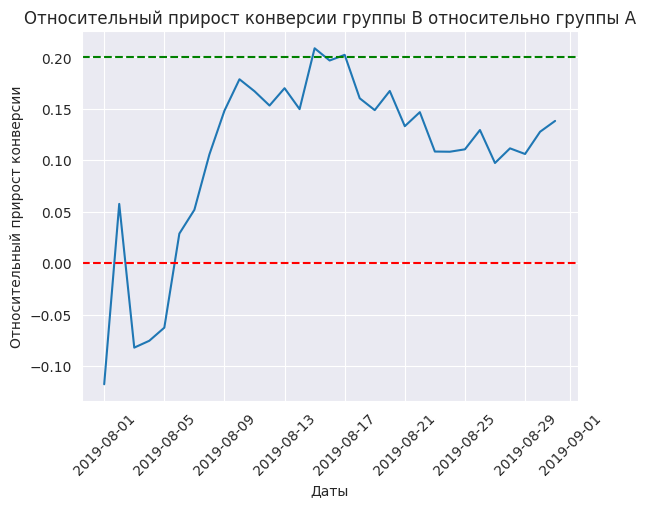

In [26]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB'] / 
         merged_cumulative_conversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y= 0.2, color='green', linestyle='--')

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Даты')
plt.ylabel('Относительный прирост конверсии')
plt.xticks(rotation=45)
plt.show()


В начале теста группа В показывала худшие результаты по сравнению с группой А, однако затем она опередила группу А, и ее конверсия начала быстро расти. В дальнейшем, наблюдался медленный спад конверсии в группе В, но в настоящее время конверсия снова начала расти.

In [27]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns =  ['visitor_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

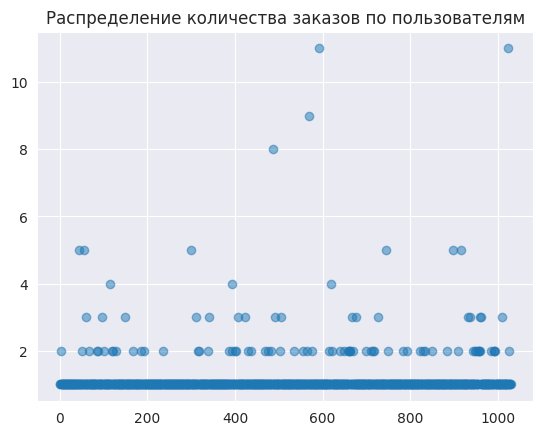

In [28]:
# строим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'],alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

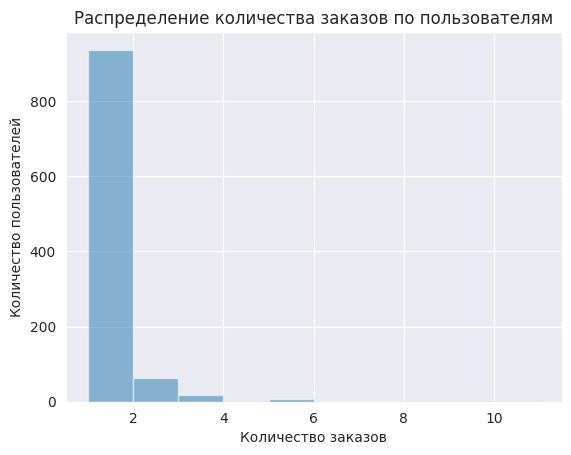

In [29]:
# строим гистограмму
plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

In [30]:
orders_by_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Большинство пользователей оформляли заказ один раз, но есть и те, кто успел сделать за месяц от восьми до одиннадцать заказов.

In [31]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Вывод: 
Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% более четырех.
Примем за верхнюю границу 4 заказа на одного пользователя.

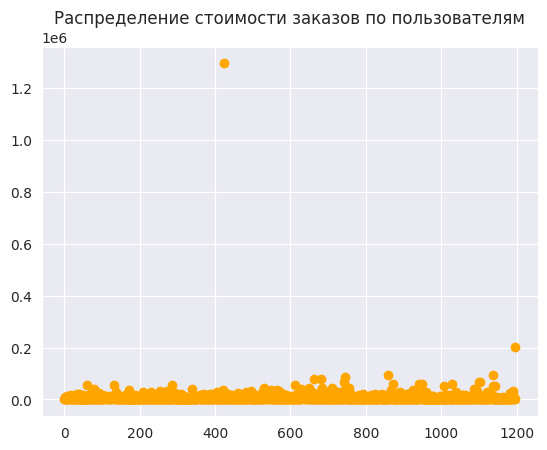

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму
plt.scatter(x_values, orders['revenue'], color='orange')
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Видим выброс на приличную сумму. Который может исказить анализ.

In [33]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Один  из заказов на 1_294_500

 График без крупных выбросов, которые заметили выше.

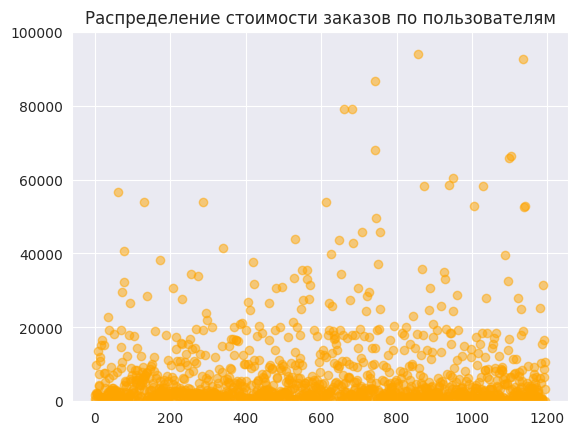

In [34]:
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue'], alpha=0.5, color='orange')
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Основная масса заказов находится в зоне до 20000.

Считаем 95-й и 99-й перцентили стоимости заказов на пользователя.

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Величина 95% перцентиля 28000, 99% перцентиля 58233.

In [36]:
# формируем датафрейм с ежедневным количеством посетителей группы A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# формируем датафрейм с кумулятивным количеством посетителей группы A на каждую дату
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# формируем датафрейм с ежедневным количеством посетителей группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# формируем датафрейм с кумулятивным количеством посетителей группы B на каждую дату
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# формируем датафрейм с ежедневным количеством заказов и выручкой группы A
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# формируем датафрейм с кумулятивным количеством заказов и выручкой группы A на каждую дату
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

# формируем датафрейм с ежедневным количеством заказов и выручкой группы B
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# формируем датафрейм с кумулятивным количеством заказов и выручкой группы B на каждую дату
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]


# Соеденение фреймов
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head())


        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01                 24              148579                 21   
1 2019-08-02                 20               93822                 24   
2 2019-08-03                 24              112473                 16   
3 2019-08-04                 16               70825                 17   
4 2019-08-05                 25              124218                 23   

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0              101217                    24                 148579   
1              165531                    44                 242401   
2              114248                    68                 354874   
3              108571                    84                 425699   
4               92428                   109                 549917   

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0                    21                 101217                 

Названия столбцов данных:
* date — дата;
* orders_per_date_a — количество заказов в выбранную дату в группе A;
* revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
* orders_per_date_b — количество заказов в выбранную дату в группе B;
* revenue_per_date_b — суммарная выручка в выбранную дату в группе B;
* orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
* revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
* orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
* revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
* visitors_per_date_a — количество пользователей в выбранную дату в группе A;
* visitors_per_date_b — количество пользователей в выбранную дату в группе B;
* visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
* visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Сформулируем гипотезы:

* Н0 :статистически значимых различий в конверсии между группами нет
* Н1 : статистически значимые различия в конверсии между группами есть

Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [37]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value по конверсии по сырым данным: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value по конверсии по сырым данным: 0.017
Относительный прирост конверсии группы B: 0.138


Вывод:
На основании "сырых" данных мы отвергаем гипотезу H0 о том, что между группами нет различий в конверсии, так как значение p-value равно 0.017, что меньше уровня статистической значимости. Относительная разница в конверсии между группами составила 13.8%, то есть конверсия группы B выше, чем у группы A. Поэтому можно предположить, что в группе B реализована фича, которая положительно сказалась на конверсии.

Сформулируем гипотезы:

* H0: между группами нет статистически значимых различий в среднем чеке заказа.
* H1: между группами есть статистически значимые различия в среднем чеке заказа.

Для проверки гипотез используется тест Манна-Уитни с уровнем статистической значимости 0,05. 

In [38]:
print('P-value по среднему чеку до очистки данных:{0:.3f}'
       .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
       orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к А по сырым данным:{0:.3f}'
       .format(orders[orders['group']=='B']['revenue'].mean() / 
        orders[orders['group']=='A']['revenue'].mean()-1))

P-value по среднему чеку до очистки данных:0.729
Относительный прирост среднего чека группы B к А по сырым данным:0.259


По "сырым" данным значение p-value равно 0,729 что значительно больше уровня статистической значимости. Следовательно, гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Однако относительная разница суммы среднего чека между группами составила 25,9%, что говорит о том, что сумма среднего чека группы В значительно больше, чем в группе А. Возможно, причина такого различия - в выбросах.

Итак, на основе "сырых" данных мы не можем сделать однозначный вывод о наличии различий в среднем чеке между группами.

95-й и 99-й перцентили средних чеков равны 28_000 и 58_233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 45 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 45_000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [39]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 4]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 4]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 45000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
1137    759473111
949     887908475
744     888512513
709     950626008
dtype: int64
24


Всего 24 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [40]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [41]:
print('P-value конверсии по очищеным данным {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост конверсии группы B:{0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean()-1))

P-value конверсии по очищеным данным 0.011
Относительный прирост конверсии группы B:0.163


Вывод:
На основании "очищенных" данных мы отвергаем гипотезу H0 о том, что между группами нет различий в конверсии, так как значение p-value равно 0.011(небольшое снижение к сырым данным), что меньше уровня статистической значимости. Относительная разница в конверсии между группами составила 16.3%(разница в конверсии выросла на 2,5%), то есть конверсия группы B выше, чем у группы A. 

Произошло ли что-нибудь с результатами по среднему чеку?

In [42]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.667
0.049


Вывод:
P-value равен 0.667, что говорит о том, что нулевую гипотезу, о равенстве среднего чека в обеих группах, не удалось отвергнуть. Таким образом, нет достаточных оснований считать группы различными по среднему чеку. Относительный прирост В к А составляет 0.049, а значит, различий между группами по среднему чеку практически нет.


### Вывод:

Исходя из предоставленных данных интернет-магазина, были проведены исследования и сформулированы рекомендации:

По приоритизации гипотез, следует обратить внимание на гипотезы: 

1. "Запустить акцию, дающую скидку на товар в день рождения" 
2. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
3. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 

Если охват пользователей включается в ранжирование гипотез, то рекомендуется следовать порядку: 

1. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 
2. "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
3. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

В отношении анализа А/В теста:

* Существует статистически значимое различие в конверсии между группами, как для "сырых" данных, так и для данных после фильтрации аномалий. 
* Конверсия в группе В выше, чем в группе А, на 14-15%.
* Нет статистически значимого различия в среднем чеке между группами ни для "сырых" данных, ни для данных после фильтрации аномалий. Однако средний чек в группе В выше.
График изменения кумулятивной конверсии группы В к группе А показывает стабильное превосходство результатов группы В.
На основании полученных результатов рекомендуется остановить тест и зафиксировать победу группы В, так как ее конверсия значительно выше, чем у группы А.